In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
most_recent_date

('2017-08-23')

One year before ('2017-08-23',) is: 2016-08-23


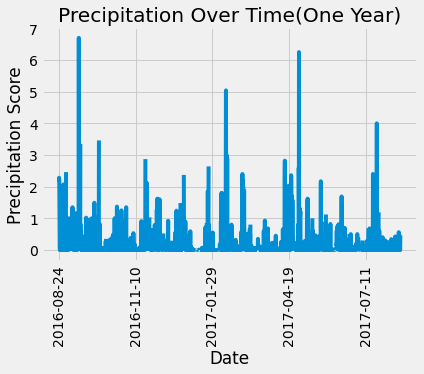

In [58]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_before = dt.date(2017,8,23) - pd.Timedelta(days=365)
print(f'One year before {most_recent_date} is: {one_year_before}')
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement_table.date, measurement_table.prcp).\
                        filter(measurement_table.date > one_year_before).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation_scores)
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending='True')
prcp_df
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('date','prcp',legend=False)
plt.xlabel('Date')
plt.ylabel('Precipitation Score')
plt.xticks(rotation=90)
plt.title('Precipitation Over Time(One Year)')
plt.show()

In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number stations in the dataset
numb_stations = session.query(func.count(station_table.station)).first()
numb_stations

(9)

In [73]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement_table.station, func.count(measurement_table.station)).\
                        group_by(measurement_table.station).\
                        order_by(func.count(measurement_table.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
print(most_active_station)
lowest_temp = session.query(func.min(measurement_table.tobs)).filter(measurement_table.station == most_active_station).first()
print(f'min: {lowest_temp[0]}')
highest_temp = session.query(func.max(measurement_table.tobs)).filter(measurement_table.station == most_active_station).first()
print(f'max: {highest_temp[0]}')
avg_temp = session.query(func.avg(measurement_table.tobs)).filter(measurement_table.station == most_active_station).first()
print(f'avg: {round(avg_temp[0], 2)}')

USC00519281
min: 54.0
max: 85.0
avg: 71.66


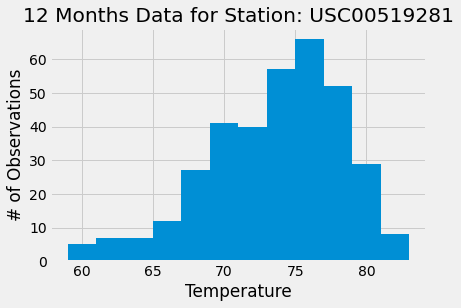

In [111]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months = session.query(measurement_table.tobs).\
                    filter(measurement_table.station == most_active_station).\
                    filter(measurement_table.date > one_year_before).all()

b = map(lambda x: x[0], last_12_months)
cleaned_temp_list = list(b)
cleaned_temp_list
plt.hist(x = cleaned_temp_list, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('# of Observations')
plt.title(f'12 Months Data for Station: {most_active_station}')
plt.show()

# Close session

In [112]:
# Close Session
session.close()